Machine Learning Exercises

# Imports

In [251]:
import numpy as np
from numpy.polynomial import polynomial as P
from matplotlib import pyplot as plt

# Utilities

In [534]:
def white_noise(number, variance):
    noise = np.random.normal(loc=0.0, scale=variance, size=number)
    return noise

def create_points(number):
    x = np.linspace(start=0.0, stop=2.0, num=number)
    return x

def create_X(polynomial_degree, number, random=False):
    X = np.zeros((number, polynomial_degree + 1))
    for j in range(0, polynomial_degree + 1):
            X[:, j] = np.array(create_points(number))
            if random:
                temp = np.array(np.random.rand(number) * 2)
                X[:, j] = np.sort(temp)
            for i in range(0, number):
                X[i, j] = np.power(X[i, j], j)
    return X

def least_squares(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

def mse(real, test):
    mse = np.square(real - test).mean()
    return mse

# Problem 1

## Part 1.1

## Problem 1 - Erwthma 1 (ALTERNATIVE SOLUTION)

In [537]:
N = 20
variance = 0.1
theta_real = np.array([0.2, -1.0, 0.9, 0.7, 0.0, -0.2])

In [538]:
noise = white_noise(N, variance)

In [539]:
X = create_X(5, 20)

In [540]:
y = X @ theta_real

In [541]:
y += noise

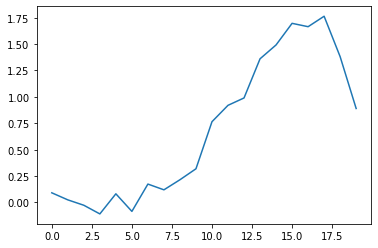

In [542]:
plt.plot(y)

In [543]:
theta_least_squares = least_squares(X, y)
theta_least_squares.round(3)

array([ 0.087, -0.769,  1.388, -1.099,  1.497, -0.574])

In [544]:
real_set = create_X(5, 1000)
y_real = real_set @ theta_real
y_real += white_noise(1000, variance)

test_set = create_X(5, 1000, random=True)
y_test = test_set @ theta_least_squares

In [545]:
mse_test = mse(y_real, y_test)
mse_test.round(3)

0.057

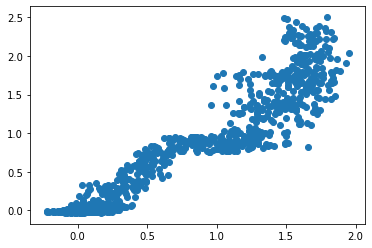

In [561]:
ax = plt.scatter(y_real, y_test)

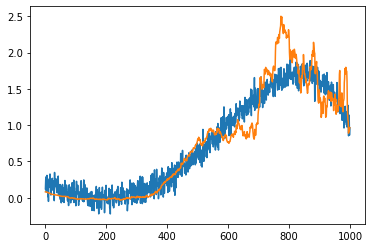

In [564]:
ax = plt.plot(y_real, markersize=0.5)
ax = plt.plot(y_test, markersize=0.5)

# Problem 1 - Erwthma 2

In [310]:
for i in range(1, 101):
    noise = white_noise(20, 0.1)
    x = create_points(20)
    y = create_distribution(x, 5, theta)
    lsv_2 = np.polyfit(x, y, 2)
    lsv_10 = np.polyfit(x, y, 10)
    y_test_2 = create_distribution(x, 2, lsv_2)
    y_test_10 = create_distribution(x, 10, lsv_10)
    means_2.append(np.mean(y_test_2))
    stdevs_2.append(np.std(y_test_2))
    means_10.append(np.mean(y_test_10))
    stdevs_10.append(np.std(y_test_10))

NameError: name 'theta' is not defined